In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Graaskamp,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.tournament import RoundRobinTournament

import torch
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 12)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    AllC,
    AllD,
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
])

In [3]:
class QLearningTest(DeepQLearner):
    lookback = 4
    epsilon = 0.2

agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=200,
    noise=0,
    repetitions=10,
    epochs=10,
)

TRAINING AGAINST <class 'tournament.agents.axelrod_first.Joss'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.SteinAndRapoport'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Grudger'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Grofman'>
TRAINING AGAINST <class 'tournament.agents.constant.AllC'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.TidemanAndChieruzzi'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Tullock'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Downing'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Shubik'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Feld'>
TRAINING AGAINST <class 'tournament.agents.tft.TitForTat'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Davis'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Nydegger'>
TRAINING AGAINST <class 'tournament.agents.constant.AllD'>
TRAINING AGAINST <class 'tournament.agents.axelrod_first.Joss'>
TRAINING 

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 69644, <Action.DEFECT: 1>: 210356}
{<Action.COOPERATE: 0>: 0.24872857142857144, <Action.DEFECT: 1>: 0.7512714285714286}


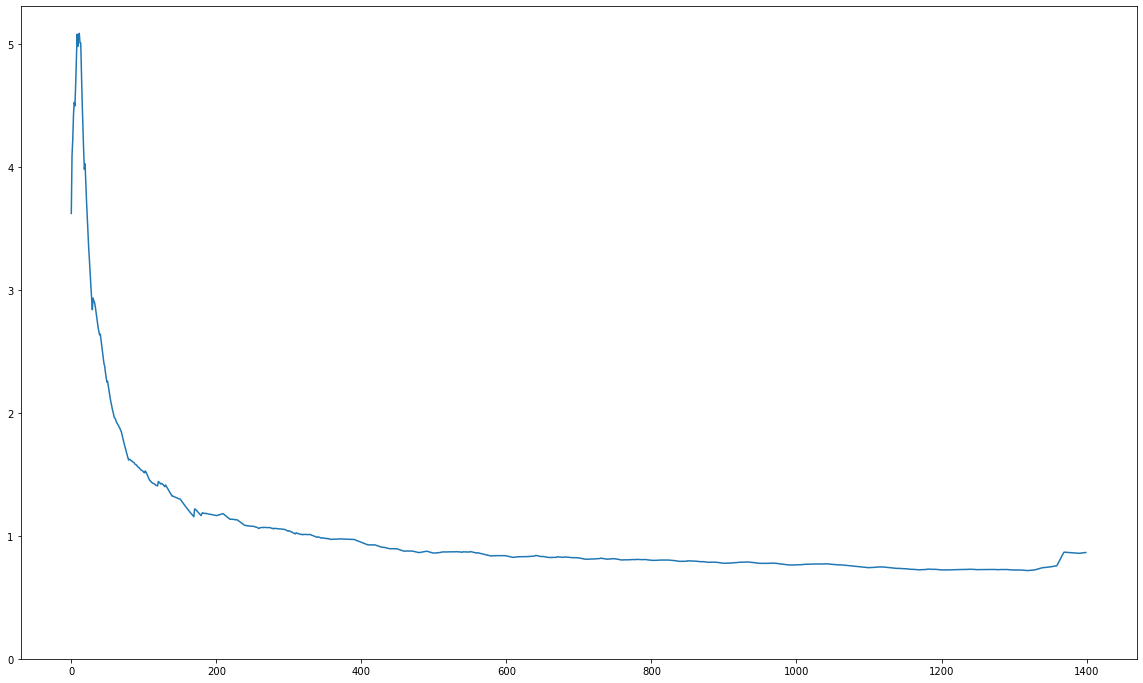

In [6]:
plt.plot(agent._losses)
plt.ylim(bottom=0)
plt.show()

In [7]:
torch.save(agent._q_network.state_dict(), "model.pt")

In [8]:
agent._q_network.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.8618, -1.4481],
                      [-0.3599, -0.2434],
                      [ 0.3997, -0.0090],
                      [ 0.3989,  0.2466],
                      [-0.7046, -1.1317],
                      [-0.5253,  0.3733],
                      [ 0.0783, -0.5974],
                      [-0.5053, -0.1465],
                      [-1.0905,  0.4380],
                      [-0.2576,  0.1314],
                      [ 0.2791, -0.4868],
                      [ 0.0129, -0.1767],
                      [-0.1007,  0.0369],
                      [ 0.4744, -0.5878],
                      [ 0.2441, -0.3463],
                      [-0.5340, -0.5907]])),
             ('layer1.bias',
              tensor([-0.1128, -0.2444, -0.6415, -0.7497, -0.0199, -0.3810, -0.2170, -0.6983,
                      -0.4390, -0.1551, -0.2811, -0.0512,  9.4943, -0.6660, -0.4664, -0.3548])),
             ('layer2.weight',
              tensor([[-4.2350e-01, -2.4080

In [9]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=2, bias=True)
)

In [10]:
# tournament = RoundRobinTournament([
#     AllC,
#     AllD,
#     TitForTat,
#     Davis,
#     Downing,
#     Feld,
#     Graaskamp,
#     Grofman,
#     Grudger,
#     Joss,
#     Nydegger,
#     Shubik,
#     SteinAndRapoport,
#     TidemanAndChieruzzi,
#     Tullock
# ], [agent])

tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=50, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [03:22<00:00,  4.74matches/s]

TitForTat                      789                  13.921758000000004  
SecondByBlackK83R              789                  22.303577999999995  
OmegaTFT                       778                  18.784743000000002  
Leyvraz                        768                  91.545647           
Weiner                 768                  43.61770599999999   
White              766                  18.269478000000003  
TFTT                           762                  15.463011000000002  
TTFT                           759                  16.287016           
GraaskampAndKatzen        758                  16.550006999999994  
SteinAndRapoport               755                  48.829485           
Borufsen                       752                  18.487247000000004  
GenerousTFT                    746                  14.786965000000004  
Shubik                         745                  14.764076000000003  
GradualTFT                     743                  382.451952          
Tid